In [3]:

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress

import cv2
import torch
from torch.utils.data import Dataset, random_split

from torchvision.models import resnet18

import torchvision.transforms as transforms
import torch.optim as optim

import torch
import torch.nn as nn
import torch.nn.functional as F

import pretrainedmodels

from scipy.spatial.transform import Rotation as R
from torch.autograd import Variable



In [24]:
MAIN_PATH = "/home/mmotaksano/Unity_projects/FetalUltrasoundSimulator_test1/AcquiredData/Images1"

In [25]:
images_paths_list = sorted(os.listdir(MAIN_PATH))
print(len(images_paths_list))
images_paths_list


308


['image_1.png',
 'image_10.png',
 'image_100.png',
 'image_101.png',
 'image_102.png',
 'image_103.png',
 'image_105.png',
 'image_106.png',
 'image_107.png',
 'image_108.png',
 'image_109.png',
 'image_11.png',
 'image_110.png',
 'image_111.png',
 'image_112.png',
 'image_113.png',
 'image_114.png',
 'image_115.png',
 'image_116.png',
 'image_118.png',
 'image_119.png',
 'image_12.png',
 'image_120.png',
 'image_122.png',
 'image_123.png',
 'image_124.png',
 'image_125.png',
 'image_126.png',
 'image_127.png',
 'image_128.png',
 'image_129.png',
 'image_13.png',
 'image_130.png',
 'image_131.png',
 'image_132.png',
 'image_133.png',
 'image_134.png',
 'image_135.png',
 'image_136.png',
 'image_137.png',
 'image_138.png',
 'image_139.png',
 'image_14.png',
 'image_140.png',
 'image_141.png',
 'image_142.png',
 'image_143.png',
 'image_144.png',
 'image_145.png',
 'image_146.png',
 'image_147.png',
 'image_148.png',
 'image_149.png',
 'image_15.png',
 'image_150.png',
 'image_151.png',


/home/mmotaksano/Unity_projects/FetalUltrasoundSimulator_test1/AcquiredData/Images1/image_201.png
(232, 211)


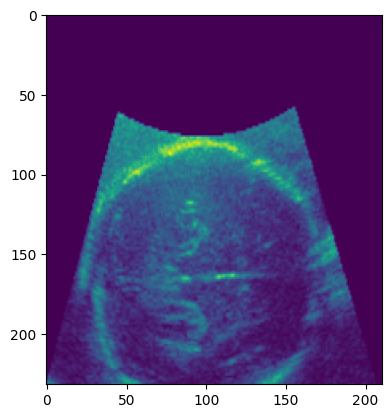

In [26]:
image_path = os.path.join(MAIN_PATH, images_paths_list[111])
print(image_path)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
plt.imshow(image)

In [27]:
image2 = cv2.copyMakeBorder(image,0,0,7,6,cv2.BORDER_CONSTANT,value=0)
image2 = image2[4:228, :]

In [28]:
image2.shape

(224, 224)

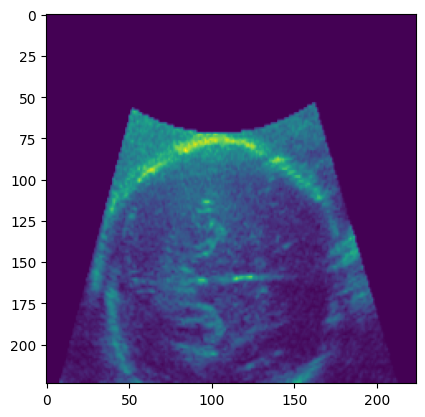

In [29]:
plt.imshow(image2)

In [69]:
main_path = "~/Unity_projects/FetalUltrasoundSimulator_test1/AcquiredData/Poses1/"
file_path = "pos_unity.csv"
df = pd.read_csv(os.path.join(main_path, file_path))


(320, 7)

In [70]:
print("INFO ABOUT POSES.CSV FILE")
print(df.shape)

print("Min, Max values")
print(df.values[0, :-1])
print(df.values[-1, :-1])


for col_name in df.columns[:-1]:

    result_df = df.drop_duplicates(subset=[col_name], keep='first')
    
    diff = result_df[col_name].diff(periods=1).fillna(0).values[-1]
    print(f"Column: {col_name}, step value: {diff}")

INFO ABOUT POSES.CSV FILE
(320, 7)
Min, Max values
[-0.04  -0.001 -0.19   0.     0.     0.   ]
[-0.004      -0.001      -0.00099991  0.          0.          0.        ]
Column: pos_x, step value: 0.008999998999999998
Column: pos_y, step value: 0.0
Column: pos_z, step value: 0.0029999996
Column: rot_x, step value: 0.0
Column: rot_y, step value: 0.0
Column: rot_z, step value: 0.0


In [71]:
main_path = "~/Unity_projects/FetalUltrasoundSimulator_test1/AcquiredData/Poses2/"
file_path = "pos_unity.csv"
df = pd.read_csv(os.path.join(main_path, file_path))

print("INFO ABOUT POSES.CSV FILE")
print(df.shape)

print("Min, Max values")
print(df.values[0, :-1])
print(df.values[-1, :-1])


for col_name in df.columns[:-1]:

    result_df = df.drop_duplicates(subset=[col_name], keep='first')
    
    diff = result_df[col_name].diff(periods=1).fillna(0).values[-1]
    print(f"Column: {col_name}, step value: {diff}")

INFO ABOUT POSES.CSV FILE
(320, 7)
Min, Max values
[ 0.    -0.001  0.     0.     0.     0.   ]
[ 0.036     -0.001      0.1890001  0.         0.         0.       ]
Column: pos_x, step value: 0.008999999999999998
Column: pos_y, step value: 0.0
Column: pos_z, step value: 0.0030000000000000027
Column: rot_x, step value: 0.0
Column: rot_y, step value: 0.0
Column: rot_z, step value: 0.0


In [67]:
df

,pos_x,pos_y,pos_z,rot_x,rot_y,rot_z,id
0,0.000,-0.001,0.000,0,0,0,0
1,0.000,-0.001,0.003,0,0,0,1
2,0.000,-0.001,0.006,0,0,0,2
3,0.000,-0.001,0.009,0,0,0,3
4,0.000,-0.001,0.012,0,0,0,4
...,...,...,...,...,...,...,...
315,0.036,-0.001,0.177,0,0,0,315
316,0.036,-0.001,0.180,0,0,0,316
317,0.036,-0.001,0.183,0,0,0,317
318,0.036,-0.001,0.186,0,0,0,318


In [32]:
df[df['id']==15]

,pos_x,pos_y,pos_z,rot_x,rot_y,rot_z,id
15,0.0,-0.001,0.045,0,0,0,15


In [33]:
id = 15
df[df['id']==id].values[:,:-1]

array([[ 0.   , -0.001,  0.045,  0.   ,  0.   ,  0.   ]])

In [34]:
class SegmentationDataSet(Dataset):
    def __init__(self, parameters):
        


        self.data_path = parameters["data_path"]
        self.size = parameters["size"]
        self.range = parameters["range"]
        self.selected_labels = parameters['selected_labels']


        self.images_names_list = sorted(os.listdir(MAIN_PATH))
        self.images_paths_list = [os.path.join(MAIN_PATH, i) for i in self.images_names_list]

        main_path = "~/Unity_projects/FetalUltrasoundSimulator_test1/AcquiredData/Poses1/"
        file_path = "pos_unity.csv"
        self.label_df = pd.read_csv(os.path.join(main_path, file_path))

    
    def __len__(self):
        """ __len__ function """
        # if len(self.images_paths_list) == len(self.masks_paths_list):
        #     return len(self.images_paths_list)
        return len(self.images_paths_list)

    def get_by_index(self, idx):
        return self.__getitem__(idx)

    def __getitem__(self, index:int=0):
        """ Load images and masks from their lists by given index

        Arguments:
          index (int) : index to get one pair of image-mask
        Returns:
          image (numpy.ndarray): output image
          mask (numpy.ndarray): image mask
        """
        label = 0

        image_path = self.images_paths_list[index]
        image = self.load_preprocess_image(image_path)
        # print(image.shape, mask.shape)

        name = self.images_names_list[index]
        id = name.split("_")[-1].split(".")[0]

        label = torch.from_numpy(self.label_df[self.label_df['id']==int(id)].values[:,:-1]).squeeze(0)
        # print(name, id, label)

        # print("d ", label.shape)


        return image, label
    
    def load_preprocess_image(self, image_path):

        # load image and mask in itk format
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image2 = cv2.copyMakeBorder(image,0,0,7,6,cv2.BORDER_CONSTANT,value=0)
        image2 = image2[4:228, :]
        # print(image2.shape)


        # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # image, _ = cropp_to_square(image, mask)
        # image = cv2.resize(image, self.size, interpolation = cv2.INTER_NEAREST)
        # image = normalize(image).astype(np.float32)

        image_th = torch.from_numpy(image2).unsqueeze(0)
        # # 0 - Background, 1 - Head, 2 - SP
        # mask_th = torch.argmax(mask_th, dim=-1).unsqueeze(-1)

        

        return image_th

In [35]:
parameters_dataset = {"data_path": MAIN_PATH,
            "size": (224,224),
            "range": None,
            "selected_labels": None}

train_dataset = SegmentationDataSet(parameters_dataset)
print(len(train_dataset))


train_set, val_set = random_split(train_dataset, 
                                [300, 20], generator=torch.Generator().manual_seed(42))

train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, num_workers = 1, pin_memory = True,
                                        shuffle=True)

print(len(train_loader))




308


ValueError: Sum of input lengths does not equal the length of the input dataset!

In [17]:
for i, (image_batch, mask_batch) in enumerate(train_loader):

    if i <5:
        # print(i, len(image_batch), image_batch.shape, image_batch[0].shape, image_batch[1])


        print(i, len(mask_batch), mask_batch.shape, mask_batch[0].shape, mask_batch[1])
    else:
        break


    

0 4 torch.Size([4, 6]) torch.Size([6]) tensor([ 0.0090, -0.0010,  0.0600,  0.0000,  0.0000,  0.0000],
       dtype=torch.float64)
1 4 torch.Size([4, 6]) torch.Size([6]) tensor([ 0.0180, -0.0010,  0.1440,  0.0000,  0.0000,  0.0000],
       dtype=torch.float64)
2 4 torch.Size([4, 6]) torch.Size([6]) tensor([ 0.0360, -0.0010,  0.1290,  0.0000,  0.0000,  0.0000],
       dtype=torch.float64)
3 4 torch.Size([4, 6]) torch.Size([6]) tensor([ 0.0270, -0.0010,  0.1590,  0.0000,  0.0000,  0.0000],
       dtype=torch.float64)
4 4 torch.Size([4, 6]) torch.Size([6]) tensor([ 0.0270, -0.0010,  0.1770,  0.0000,  0.0000,  0.0000],
       dtype=torch.float64)


In [18]:
class ResidualBlock(nn.Module):
    def __init__(self, inchannel, outchannel, stride=1):
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(
            nn.Conv2d(inchannel, outchannel, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(outchannel),
            nn.ReLU(inplace=True),
            nn.Conv2d(outchannel, outchannel, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(outchannel)
        )

        self.shortcut = nn.Sequential()
        if stride != 1 or inchannel != outchannel:
            self.shortcut = nn.Sequential(
                nn.Conv2d(inchannel, outchannel, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(outchannel)
            )
            

    def forward(self, x):
        out = self.left(x)
        out = out + self.shortcut(x)
        out = F.relu(out)
        print(out.shape)

        return out

class ResNet(nn.Module):
    def __init__(self, ResidualBlock, num_classes=1):
        super(ResNet, self).__init__()
        self.inchannel = 64
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        
        self.layer1 = self.make_layer(ResidualBlock, 64, 2, stride=1)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride=2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride=2)        
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride=2)    

        self.layer5 = self.make_layer(ResidualBlock, 1024, 2, stride=2)    

        self.fc = nn.Linear(512, 9)
        
        
    def make_layer(self, block, channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.inchannel, channels, stride))
            self.inchannel = channels
        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        out = self.conv1(x)

        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        # out = self.layer5(out)

        print(out.shape)
        # out = F.avg_pool2d(out, 4)
        ada = nn.AdaptiveAvgPool2d(1)
        out = ada(out)
        print(out.shape)


        out = out.view(out.size(0), -1)
        print(out.shape)


        out = self.fc(out)
        print(out.shape)

        return out

In [19]:
def compute_losses(x_transl, x_rot, labels):
    print("LOSSES")
    print("x_transl, x_rot, labels, ")
    print(x_transl.shape, x_rot.shape, labels.shape)

    loss_function = nn.MSELoss(reduction='mean')

    rot_matrix_losses = []
    translation_losses = []

    for i in range(x_rot.shape[0]):

        r_label = R.from_euler('xyz', labels[i, 3:], degrees=True).as_matrix().astype(float)
        # r_label = r_label.as_matrix()
        # print(x_rot[i], r_label)
        # print(x_rot[i].view(9))
        # print(x_rot[i].view(9).size())

        # print(x_rot.view(x_rot.shape[0], 9))
        # print(x_rot.view(x_rot.shape[0], 9).size())


        # print(x_rot.view(x_rot.shape[0], 9)[0])
        # print(torch.from_numpy(r_label).view(-1,9))


        rot_matrix_loss = loss_function(x_rot[i].view(9), torch.from_numpy(r_label).view(9))
        rot_matrix_losses.append(rot_matrix_loss)

        translation_loss = loss_function(x_transl[i], labels[i, :3])
        translation_losses.append(translation_loss.item())

        # print(rot_matrix_loss, translation_loss)

    print(rot_matrix_losses, translation_losses)
    print(torch.tensor(translation_losses))
    print(torch.mul(torch.tensor(translation_losses), 0.1))

    total_losses = torch.tensor(rot_matrix_losses) + torch.mul(torch.tensor(translation_losses), 0.1)
    print("total losses ", total_losses)

    return torch.mean(total_losses)



def compute_rotation_matrix_from_ortho6d(v):

    R_output_list = []

    for i in range(v.shape[0]): # v shape[B,6]
        # print(v)
        v1 = v[i,:3]
        v2 = v[i, 3:]
        # print(v1, v2)
            # Normalize v1 to get e1
        e1 = v1 / torch.norm(v1)

        # Project v2 onto the plane orthogonal to e1 and normalize to get e2
        u2 = v2 - torch.dot(e1, v2) * e1
        e2 = u2 / torch.norm(u2)

        # Compute e3 as the cross product of e1 and e2
        e3 = torch.linalg.cross(e1, e2)

        # Form the rotation matrix R with e1, e2, and e3 as columns
        R = torch.stack((e1, e2, e3), dim=1)
        R_output_list.append(R)

        # print(R)

    R_output = torch.stack(R_output_list,0 )
    print(R_output.shape)

    return R_output

class ResNet2(nn.Module):
    def __init__(self):
        super(ResNet2, self).__init__()
        self.model =  pretrainedmodels.__dict__['resnet18'](pretrained='imagenet')
        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.regression_layer = nn.Sequential(nn.Linear(512, 9))

    def forward(self, x):
        batch_size ,_,_,_ = x.shape #taking out batch_size from input image
        x = self.model.features(x)

        x = torch.nn.functional.adaptive_avg_pool2d(x,1).reshape(batch_size,-1) # then reshaping the batch_size
        
        x = self.regression_layer(x)
        x_transl = x[:, -3:]
        x_rot = compute_rotation_matrix_from_ortho6d(x[:, :6].view(
            batch_size, -1))

        return x_transl, x_rot



def compute_rotation_matrix_l2_loss(gt_rotation_matrix, predict_rotation_matrix):
    loss_function = nn.MSELoss()
    loss = loss_function(predict_rotation_matrix, gt_rotation_matrix)

    return loss

# def compute_rotation_matrix_geodesic_loss(gt_rotation_matrix, predict_rotation_matrix):
#     theta = compute_geodesic_distance_from_two_matrices(gt_rotation_matrix, predict_rotation_matrix)
#     error = theta.mean()

#     return error

In [20]:
# model = ResNet(ResidualBlock)
model = ResNet2()

EPOCH = 1
pre_epoch = 0
BATCH_SIZE = 128
LR = 0.01


# criterion = nn.MSELoss(reduction='none')
criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=LR, momentum=0.9, weight_decay=5e-4)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/mmotaksano/anaconda3/envs/fetal_pose_regression/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/mmotaksano/anaconda3/envs/fetal_pose_regression/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [21]:
model.model.input_size

[3, 224, 224]

In [22]:


#train
for epoch in range(pre_epoch, EPOCH):
    print('\nEpoch: %d' % (epoch + 1))
    model.train()
    sum_loss = 0.0
    correct = 0.0
    total = 0.0

    for i, data in enumerate(train_loader, 1):
        print(i)
        if i == 2:
            break
        #prepare dataset
        length = len(train_loader)
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        #forward & backward
        # outputs = model(inputs.float())
        # print(outputs, outputs.shape)
        
        x_transl, x_rot = model(inputs.float())
        print(x_transl.shape, x_rot.shape)

        print(labels.shape)
        print(labels)

        # output_
        
        # Compute Loss
        loss = compute_losses(x_transl, x_rot, labels)
        loss = Variable(loss, requires_grad = True)

        # outputs2 = outputs
        # labels2 = labels

        # loss = criterion(outputs, labels.float())
        # print('loss' , loss)

        # print(torch.mean(loss, dim = 1))
        # # loss.backward()
        # print(torch.mean(torch.mean(loss, dim = 1)))

        # loss = criterion(outputs, labels.float())
        # print('loss' , loss)
        loss.backward()

        optimizer.step()
        # optimizer.step()
        
        # #print ac & loss in each batch
        # sum_loss += loss.item()
        # _, predicted = torch.max(outputs.data, 1)
        # total += labels.size(0)
        # correct += predicted.eq(labels.data).cpu().sum()
        # print('[epoch:%d, iter:%d] Loss: %.03f | Acc: %.3f%% ' 
        #       % (epoch + 1, (i + 1 + epoch * length), sum_loss / (i + 1), 100. * correct / total))

        
         


Epoch: 1
1
torch.Size([4, 3, 3])
torch.Size([4, 3]) torch.Size([4, 3, 3])
torch.Size([4, 6])
tensor([[ 0.0270, -0.0010,  0.1530,  0.0000,  0.0000,  0.0000],
        [ 0.0360, -0.0010,  0.1710,  0.0000,  0.0000,  0.0000],
        [ 0.0090, -0.0010,  0.0510,  0.0000,  0.0000,  0.0000],
        [ 0.0180, -0.0010,  0.1440,  0.0000,  0.0000,  0.0000]],
       dtype=torch.float64)
LOSSES
x_transl, x_rot, labels, 
torch.Size([4, 3]) torch.Size([4, 3, 3]) torch.Size([4, 6])
[tensor(0.7583, dtype=torch.float64, grad_fn=<MseLossBackward0>), tensor(0.7246, dtype=torch.float64, grad_fn=<MseLossBackward0>), tensor(0.0622, dtype=torch.float64, grad_fn=<MseLossBackward0>), tensor(0.1707, dtype=torch.float64, grad_fn=<MseLossBackward0>)] [0.991148043571863, 0.6317699908928113, 1.4073244508293403, 0.7371560555374305]
tensor([0.9911, 0.6318, 1.4073, 0.7372])
tensor([0.0991, 0.0632, 0.1407, 0.0737])
total losses  tensor([0.8574, 0.7878, 0.2029, 0.2444], dtype=torch.float64)
2


In [26]:
loss = nn.MSELoss()
input = torch.tensor([[0.9, 0.5], [0.3, 0.5]])
target = torch.tensor([[0.5, 0.8], [0.2, 0.8]])
output = loss(input, target)
output


tensor(0.0875)

In [23]:
import torch


def gram_schmidt(vv):
    def projection(u, v):
        return (v * u).sum() / (u * u).sum() * u

    nk = vv.size(0)
    uu = torch.zeros_like(vv, device=vv.device)
    uu[:, 0] = vv[:, 0].clone()
    for k in range(1, nk):
        vk = vv[k].clone()
        uk = 0
        for j in range(0, k):
            uj = uu[:, j].clone()
            uk = uk + projection(uj, vk)
        uu[:, k] = vk - uk
    for k in range(nk):
        uk = uu[:, k].clone()
        uu[:, k] = uk / uk.norm()
    return uu


if __name__ == '__main__':
    torch.autograd.set_detect_anomaly(True)
    a = torch.randn(1,6, requires_grad=True)
    print(a)
    b = gram_schmidt(a)
    print(b)

tensor([[ 0.5393, -1.7715, -0.2218, -0.4840,  0.1662, -0.0135]],
       requires_grad=True)
tensor([[1., 0., 0., 0., 0., 0.]], grad_fn=<CopySlices>)


In [22]:


c = b.sum()
c.backward()
print(b.matmul(b.t()))
print(a.grad)

tensor([[ 1.0000e+00,  2.3753e-09, -6.4471e-08],
        [ 2.3753e-09,  1.0000e+00,  1.8696e-08],
        [-6.4471e-08,  1.8696e-08,  1.0000e+00]], grad_fn=<MmBackward0>)
tensor([[6.3647e-01, 0.0000e+00, 0.0000e+00],
        [7.4833e-01, 1.8485e-01, 1.1199e+00],
        [1.6407e+00, 0.0000e+00, 3.7253e-08]])


In [24]:
def compute_rotation_matrix(v1, v2):
    # Normalize v1 to get e1
    e1 = v1 / np.linalg.norm(v1)

    # Project v2 onto the plane orthogonal to e1 and normalize to get e2
    u2 = v2 - np.dot(e1, v2) * e1
    e2 = u2 / np.linalg.norm(u2)

    # Compute e3 as the cross product of e1 and e2
    e3 = np.cross(e1, e2)

    # Form the rotation matrix R with e1, e2, and e3 as columns
    R = np.column_stack((e1, e2, e3))

    return R

# Example usage
v1 = np.array([1, 0, 0])
v2 = np.array([0, 1, 0])

rotation_matrix = compute_rotation_matrix(v1, v2)
print("Rotation Matrix R:\n", rotation_matrix)


Rotation Matrix R:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [121]:

def compute_rotation_matrix_torch(v1, v2):
    # Normalize v1 to get e1
    e1 = v1 / torch.norm(v1)

    # Project v2 onto the plane orthogonal to e1 and normalize to get e2
    u2 = v2 - torch.dot(e1, v2) * e1
    e2 = u2 / torch.norm(u2)

    # Compute e3 as the cross product of e1 and e2
    e3 = torch.linalg.cross(e1, e2)

    # Form the rotation matrix R with e1, e2, and e3 as columns
    R = torch.stack((e1, e2, e3), dim=1)

    return R

# Example usage
v1 = torch.tensor([120.0, 30.0, 270.0])
v2 = torch.tensor([0.0, 177.0, 90.0])

rotation_matrix = compute_rotation_matrix_torch(v1, v2)
print("Rotation Matrix R:\n", rotation_matrix)

Rotation Matrix R:
 tensor([[ 0.4041, -0.2346, -0.8841],
        [ 0.1010,  0.9721, -0.2118],
        [ 0.9091, -0.0037,  0.4165]])


In [115]:




# Example usage
v1 = torch.tensor([0.0, 0.0, 90])
v2 = torch.tensor([0.0, 0.0, 90])
rotation_matrix = compute_rotation_matrix_torch(v1, v2)
print("Rotation Matrix R:\n", rotation_matrix)

Rotation Matrix R:
 tensor([[0., nan, nan],
        [0., nan, nan],
        [1., nan, nan]])


In [111]:
from scipy.spatial.transform import Rotation as R

r = R.from_euler('xyz', [0, 0, 90], degrees=True)

r.as_matrix()

array([[ 2.22044605e-16, -1.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.22044605e-16,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [113]:
r.as_rotvec()

array([0.        , 0.        , 1.57079633])

In [112]:
import numpy as np

def euler_to_rotation_matrix(v, order='XYZ'):
    # Extract individual angles
    vx, vy, vz = v
    
    # Rotation matrices around the X, Y, and Z axes
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(vx), -np.sin(vx)],
        [0, np.sin(vx), np.cos(vx)]
    ])
    
    Ry = np.array([
        [np.cos(vy), 0, np.sin(vy)],
        [0, 1, 0],
        [-np.sin(vy), 0, np.cos(vy)]
    ])
    
    Rz = np.array([
        [np.cos(vz), -np.sin(vz), 0],
        [np.sin(vz), np.cos(vz), 0],
        [0, 0, 1]
    ])
    
    # Combine rotations in the specified order
    if order == 'XYZ':
        R = np.dot(Rz, np.dot(Ry, Rx))
    elif order == 'ZYX':
        R = np.dot(Rx, np.dot(Ry, Rz))
    else:
        raise ValueError("Unsupported rotation order")
    
    return R

# Example usage
v = (np.radians(0), np.radians(0), np.radians(90))  # Euler angles in radians
rotation_matrix = euler_to_rotation_matrix(v, order='XYZ')
print("Rotation Matrix R:\n", rotation_matrix)

Rotation Matrix R:
 [[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]
